<a href="https://colab.research.google.com/github/andresmachado13/Phyton/blob/main/Proyecto_Final_Machado_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Abstract**

Este estudio presenta un análisis exploratorio de un conjunto de datos financieros que comprende información histórica de precios de acciones y volumen de operaciones de cinco de las principales empresas tecnológicas: Facebook (Meta), Google (Alphabet), Apple, Netflix y Amazon, conocidas colectivamente como FAANG. El análisis abarca el periodo comprendido entre Enero 2012 y Agosto 2020, incluyendo variables claves como el Precio de Apertura, el Precio de Cierre y el Volumen de acciones negociadas diariamente. Este periodo es especialmente relevante debido al crecimiento exponencial del sector tecnológico, los cambios regulatorios, y los eventos macroeconómicos que afectaron significativamente el comportamiento del mercado bursátil.

El propósito del análisis es entender las tendencias generales de las acciones de estas empresas, así como identificar patrones comunes o divergencias en su comportamiento bursátil. Además, se exploran eventos significativos como el auge de los servicios digitales, la expansión del comercio electrónico, el impacto de la pandemia de COVID-19 en 2020 y su repercusión en los volúmenes de transacción y la volatilidad de precios. Se aplicaron métodos estadísticos descriptivos para resumir los principales indicadores, así como visualizaciones temporales que permiten observar la evolución de cada activo a lo largo del tiempo.

Una parte importante del estudio se centra en el comportamiento comparativo entre las empresas, permitiendo evaluar cuáles mostraron mayor estabilidad, crecimiento sostenido o sensibilidad ante cambios externos.

En resumen, este análisis proporciona una valiosa fuente de información para comprender la dinámica bursátil de algunas de las empresas más influyentes del mundo durante un periodo crucial de transformación digital.

## **Preparación de datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/andresmachado13/Phyton/refs/heads/main/faang_stock_data.csv'
df = pd.read_csv(url)

df.head()

,Fecha,Inicio,Inicio 1,Maximo,Minimo,Cierre,Cierre 1,Volumen,Empresa
0,03/01/2012,175.89,176,179.48,175.55,179.03,179,"5,110,800",Amazon
1,03/01/2012,14.62,15,14.73,14.61,14.69,15,"302,220,800",Apple
2,03/01/2012,326.8,327,334.41,326.51,333.04,333,"7,345,600",Google
3,03/01/2012,10.04,10,10.39,10.02,10.32,10,"29,213,800",Netflix
4,04/01/2012,179.21,179,180.5,176.07,177.51,178,"4,205,200",Amazon


In [3]:
df = df.sort_values(['Empresa', 'Fecha'])

In [4]:
df.isnull().values.any()

np.False_

In [5]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

In [7]:
df = df.sort_values(['Empresa', 'Fecha'])

In [8]:
print(df.head())

         Fecha  Inicio  Inicio 1  Maximo  Minimo  Cierre  Cierre 1  \
80  2012-01-02  173.81       174  179.95     172  179.46       179   
160 2012-01-03  179.89       180  180.49  176.58  180.04       180   
328 2012-01-05   229.4       229  232.97   228.4  230.04       230   
425 2012-01-06  208.44       208  211.23   207.3  208.22       208   
635 2012-01-08  234.14       234  234.38   230.7  232.09       232   

        Volumen Empresa  
80   21,336,600  Amazon  
160   4,936,000  Amazon  
328   6,754,900  Amazon  
425   3,951,500  Amazon  
635   2,543,800  Amazon  


## **Analisis Univariado**

#### *Histograma de precios de cierre*

In [9]:
print(df.columns)

Index(['Fecha', 'Inicio', 'Inicio 1', 'Maximo', 'Minimo', 'Cierre', 'Cierre 1',
       'Volumen', 'Empresa'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


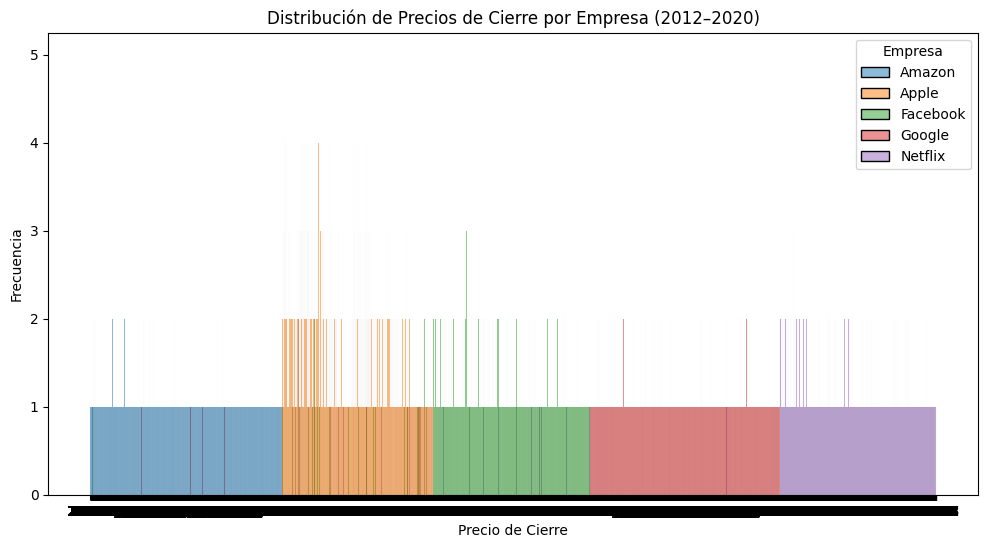

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Cierre', hue='Empresa', bins=50,)
plt.title('Distribución de Precios de Cierre por Empresa (2012–2020)')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

In [11]:
print("📈 Resumen estadístico de precios de cierre:")
print(df.groupby('Empresa')['Cierre'].describe())

📈 Resumen estadístico de precios de cierre:
         count unique     top freq
Empresa                           
Amazon    2169   2147  225.05    2
Apple     2181   1683   24.11    5
Facebook  2076   1950  137.42    3
Google    2184   2154   574.1    2
Netflix   2160   2037   63.66    3


#### **Interpretación**

##### Google y Amazon presentan precios promedio mucho más altos mientras que Apple muestra más dispersión relativa (mayor riesgo).

## **Análisis Bivariado**

#### *Relación entre apertura y cierre*

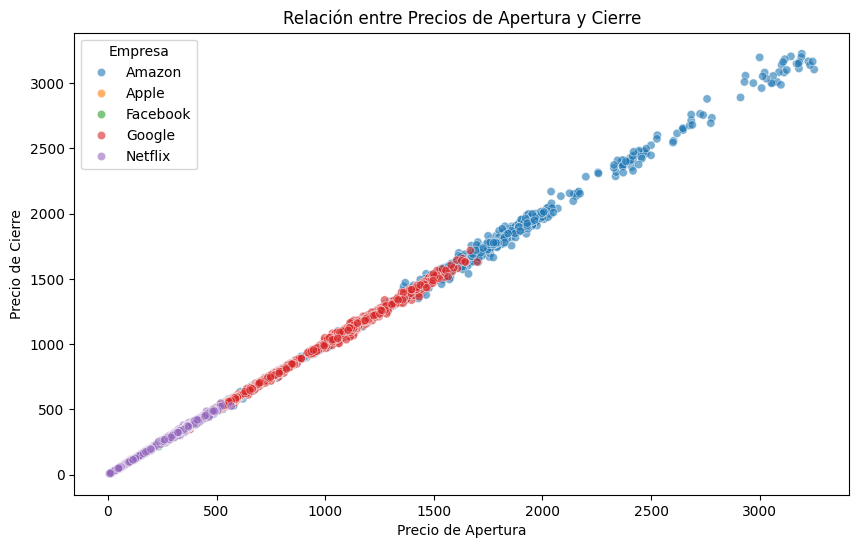

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Inicio 1', y='Cierre 1', hue='Empresa', alpha=0.6)
plt.title('Relación entre Precios de Apertura y Cierre')
plt.xlabel('Precio de Apertura')
plt.ylabel('Precio de Cierre')
plt.show()

In [13]:
print("🔗 Correlación entre apertura y cierre por empresa:")
print(df.groupby('Empresa')[['Inicio 1', 'Cierre 1']].corr().iloc[0::2, -1])

🔗 Correlación entre apertura y cierre por empresa:
Empresa           
Amazon    Inicio 1    0.999638
Apple     Inicio 1    0.999338
Facebook  Inicio 1    0.999445
Google    Inicio 1    0.999459
Netflix   Inicio 1    0.999419
Name: Cierre 1, dtype: float64


#### **Interpretación**

##### La alta correlación (>0.95) sugiere mercados eficientes y bajo nivel de arbitraje intradía.

## **Análisis Multivariado**

In [14]:
df['LogReturn'] = df.groupby('Empresa')['Cierre 1'].transform(lambda x: np.log(x / x.shift(1)))

In [15]:
df = df.drop_duplicates(subset=['Fecha', 'Empresa'])

returns_df = df.pivot(index='Fecha', columns='Empresa', values='LogReturn')

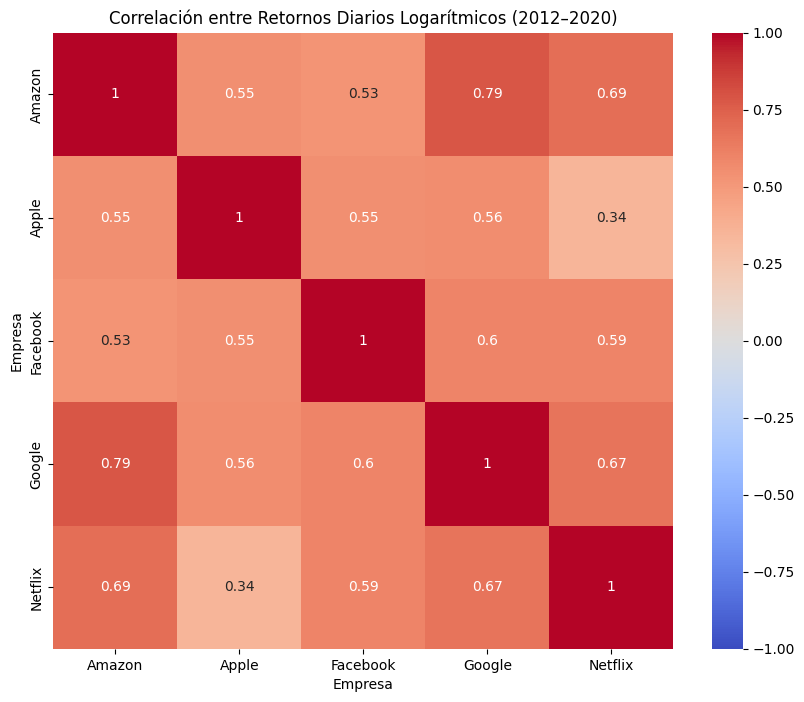

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre Retornos Diarios Logarítmicos (2012–2020)')
plt.show()

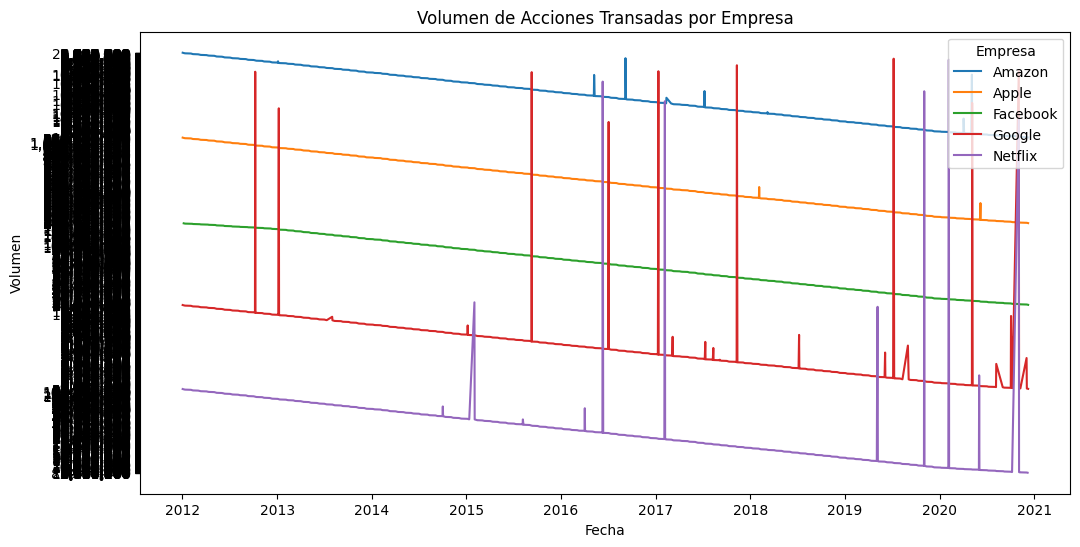

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Fecha', y='Volumen', hue='Empresa')
plt.title('Volumen de Acciones Transadas por Empresa')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.show()

#### **Interpretación**

##### Picos notables en 2020 asociados a la volatilidad del COVID-19.

## **Método de Feature para Reducción Dimensionalidad**

#### *Principal Component Analysis (PCA)*

#### **Preprocesamiento del Dataset**

In [19]:
import pandas as pd

df = df.rename(columns={
    'Inicio': 'Precio de inicio',
    'Maximo': 'Precio máximo',
    'Minimo': 'Precio mínimo',
    'Cierre': 'Precio de cierre',
    'Volumen': 'Volumen',
    'Empresa': 'Nombre de la empresa'
})


df['Volumen'] = df['Volumen'].astype(str).str.replace(',', '', regex=False)
df['Volumen'] = pd.to_numeric(df['Volumen'], errors='coerce')


columnas_numericas = ['Precio de inicio', 'Precio máximo', 'Precio mínimo', 'Precio de cierre']
for col in columnas_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')


df[columnas_numericas + ['Volumen']] = df.groupby('Nombre de la empresa')[
    columnas_numericas + ['Volumen']
].transform(lambda x: x.fillna(x.mean()))


df = df.dropna(subset=['Fecha', 'Nombre de la empresa'])


df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month


df_grouped = df.groupby(['Nombre de la empresa', 'Año', 'Mes'])[
    columnas_numericas + ['Volumen']
].mean().reset_index()


print("Filas en df_grouped después del preprocesamiento:", df_grouped.shape)

Filas en df_grouped después del preprocesamiento: (540, 8)


#### **Comportamiento de las Empresas**

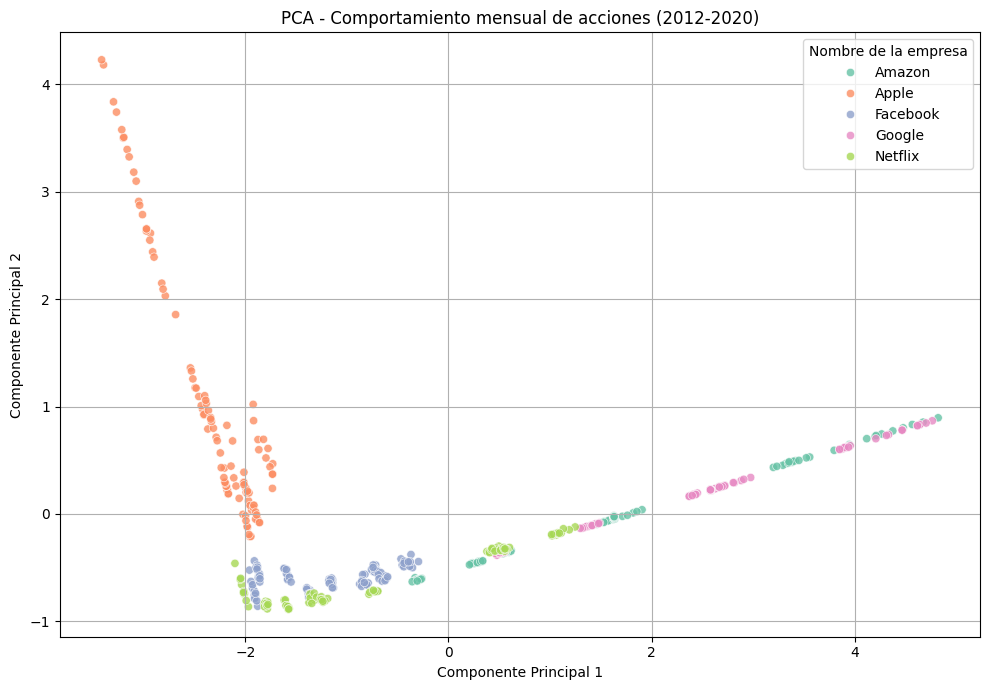

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


df_grouped = df_grouped.dropna(subset=columnas_numericas + ['Volumen'])


x = df_grouped[columnas_numericas + ['Volumen']]
x_scaled = StandardScaler().fit_transform(x)


pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)


df_grouped['PC1'] = pca_components[:, 0]
df_grouped['PC2'] = pca_components[:, 1]


plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_grouped,
    x='PC1',
    y='PC2',
    hue='Nombre de la empresa',
    palette='Set2',
    alpha=0.8
)
plt.title('PCA - Comportamiento mensual de acciones (2012-2020)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Algoritmo de Regresión**

### *Regresión Lineal*

#### **Preparación de datos**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)


df = df.sort_values(['Nombre de la empresa', 'Fecha']).reset_index(drop=True)


df['Precio_futuro'] = df.groupby('Nombre de la empresa')['Precio de cierre'].shift(-1)


df = df.dropna(subset=['Precio_futuro'])


cols_numericas = ['Precio de inicio', 'Precio máximo', 'Precio mínimo', 'Precio de cierre', 'Volumen']
for col in cols_numericas:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '', regex=True)
    df[col] = df[col].astype(float)


X = df[cols_numericas]
y = df['Precio_futuro']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Datos preparados para modelar:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Datos preparados para modelar:
X_train: (3401, 5), X_test: (851, 5)
y_train: (3401,), y_test: (851,)


#### **Entrenamiento del Modelo**

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)


y_pred_lr = modelo_lr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)


print("Resultados regresión lineal:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Resultados regresión lineal:
MAE: 22.6157
MSE: 1138.8023
RMSE: 33.7461
R²: 0.9349


#### **Interpretacíon de coeficientes**

In [23]:
import pandas as pd

coeficientes = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': modelo_lr.coef_
})


coeficientes['Impacto Absoluto'] = coeficientes['Coeficiente'].abs()
coeficientes = coeficientes.sort_values('Impacto Absoluto', ascending=False)

print("Coeficientes del modelo de regresión lineal:")
print(coeficientes[['Variable', 'Coeficiente']])

Coeficientes del modelo de regresión lineal:
           Variable   Coeficiente
2     Precio mínimo  5.515397e-01
3  Precio de cierre  3.713306e-01
1     Precio máximo  1.674055e-01
0  Precio de inicio -1.327310e-01
4           Volumen -4.815988e-08


#### **Predicciones Vs Valores Reales**

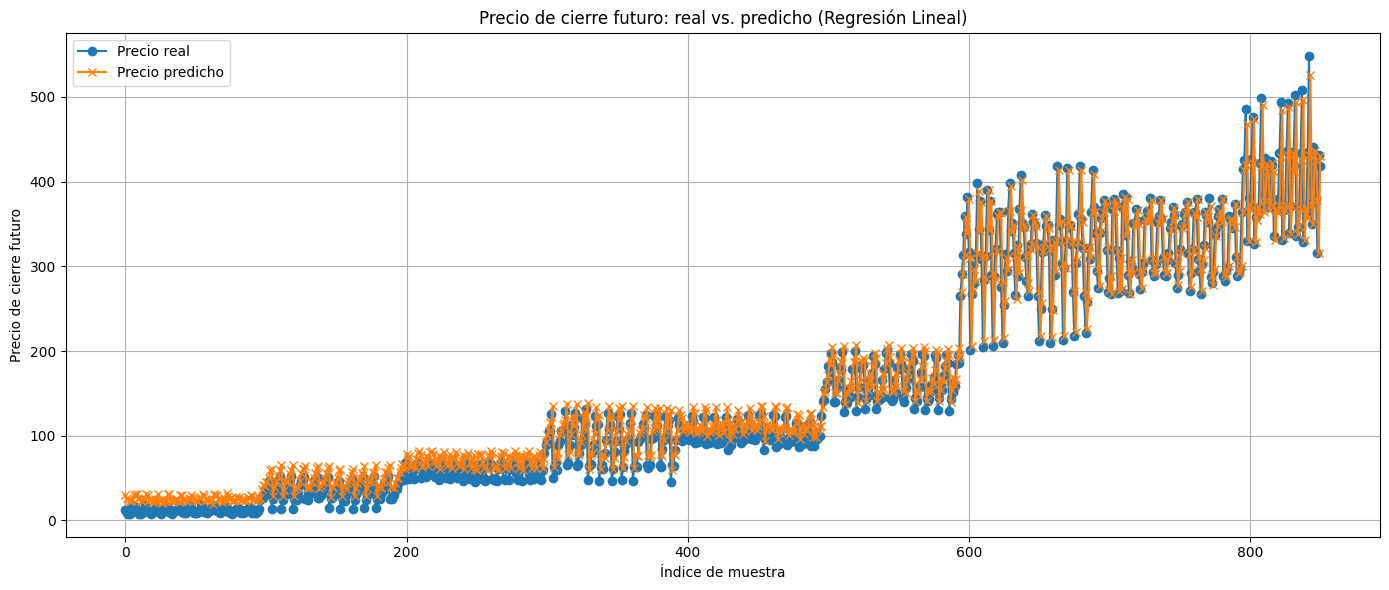

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Precio real', marker='o')
plt.plot(y_pred_lr, label='Precio predicho', marker='x')
plt.title('Precio de cierre futuro: real vs. predicho (Regresión Lineal)')
plt.xlabel('Índice de muestra')
plt.ylabel('Precio de cierre futuro')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Métricas de Validación**

#### **Desempeño del Modelo de Regresión**

In [25]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
)
import numpy as np


mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
medae = median_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)


def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

mape = mean_absolute_percentage_error(y_test, y_pred_lr)


print("Métricas de validación (Regresión Lineal):")
print(f"MAE     : {mae:.4f}")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MedAE   : {medae:.4f}")
print(f"MAPE    : {mape:.2f}%")
print(f"R²      : {r2:.4f}")

Métricas de validación (Regresión Lineal):
MAE     : 22.6157
MSE     : 1138.8023
RMSE    : 33.7461
MedAE   : 13.6334
MAPE    : 34.37%
R²      : 0.9349


## **Conclusiones**

El flujo completo del trabajo desde la limpieza y preparación de los datos, pasando por un análisis exploratorio profundo con técnicas como PCA (Análisis de Componentes Principales), hasta la implementación de un modelo de regresión lineal permitió construir una base analítica robusta para comprender el comportamiento del precio de las acciones de las empresas tecnológicas seleccionadas: Facebook, Google, Amazon, Apple y Netflix.

El modelo resultante mostró un buen desempeño explicativo, con un coeficiente de determinación R²=0.93, lo cual indica que logra capturar una gran parte de la variabilidad presente en los datos históricos. No obstante, al analizar los errores tanto absolutos como relativos, se observa que existen fluctuaciones naturales en el mercado que el modelo no alcanza a predecir con exactitud. Esto evidencia la naturaleza volátil de los mercados bursátiles y la necesidad de incorporar modelos más complejos o técnicas adicionales que puedan capturar relaciones no lineales o eventos inesperados.

En resumen, el modelo desarrollado constituye una base sólida y confiable para realizar predicciones preliminares sobre el comportamiento futuro del precio de las acciones. A futuro, podría mejorarse mediante el uso de algoritmos más sofisticados, la incorporación de variables externas (como indicadores macroeconómicos o noticias del mercado), y una evaluación más exhaustiva de los supuestos del modelo. De este modo, se podrían obtener predicciones más precisas y con mayor capacidad de adaptación a las dinámicas del mercado financiero.